In [1]:
import matplotlib.pyplot as plt
import numpy as np

print(plt.style.available)
from pytdscf.util import read_nc
from pytdscf import units

plt.style.use("bmh")

# Make all new figures/axes transparent by default
plt.rcParams["figure.facecolor"] = "none"  # or (1, 1, 1, 0)
plt.rcParams["axes.facecolor"] = "none"

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "mathtext.fontset": "cm",  # still fine; there is no LMR math in mathtext
    }
)
plt.rcParams.update(
    {
        "text.usetex": True,
        # Tell LaTeX to load any package you like
        "text.latex.preamble": r"\usepackage{amssymb}",
    }
)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/Users/hinom/GitHub/radicalpair-tensornetwork/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = read_nc("dnp_chi1024_cutoff0.1_eq_B0.05_angle0pi_over_8_n4_arnoldi_prop/reduced_density.nc", [(i,i) for i in range(27)])

In [3]:
SCALE = 1e-09
time = data["time"] * SCALE * 1e09 / units.au_in_fs
time

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
        12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
        14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
        16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
        18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
        20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
        24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75,
        26.  ,  26.25,  26.5 ,  26.75,  27.  ,  27.25,  27.5 ,  27.75,
      

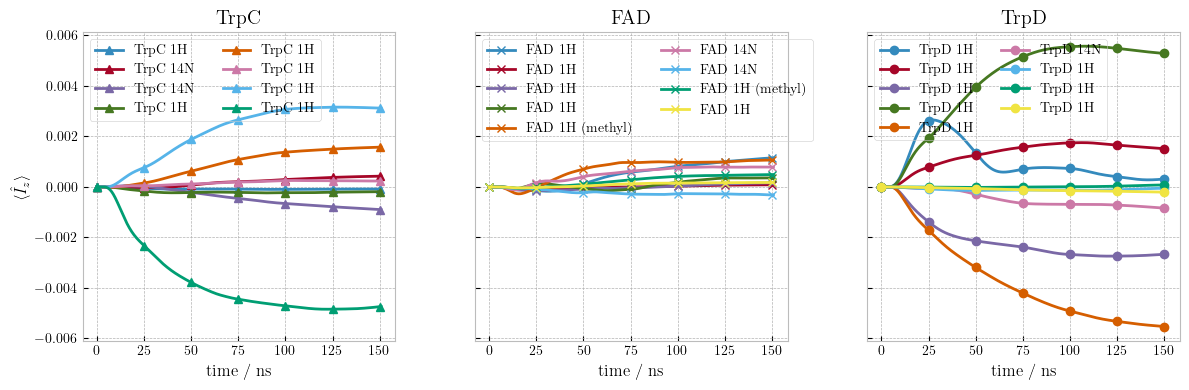

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
ax_map = {"TrpC": axes[0], "FAD": axes[1], "TrpD": axes[2]}
for mol, ax in ax_map.items():
    ax.set_title(mol)

def get_mol_marker(i: int):
    if i < 8:
        return "TrpC", "^"
    elif i < 18:
        return "FAD", "x"
    else:
        return "TrpD", "o"

def compute_y(i: int):
    rdm = data[(i, i)]
    match rdm.shape[1:]:
        case (2, 2):
            Iz = 0.5 * (rdm[:, 0, 0].real - rdm[:, 1, 1].real)
            Ix = 0.5 * (rdm[:, 0, 1] + rdm[:, 1, 0]).real
            Iy = 0.5 * (rdm[:, 0, 1] * 1j - rdm[:, 1, 0] * 1j).real
            return Ix, Iy, Iz
        case (3, 3):
            Iz =  (rdm[:, 0, 0].real - rdm[:, 2, 2].real)
            Ix = np.sqrt(2) / 2 * (rdm[:, 0, 1] + rdm[:, 1, 0] + rdm[:, 1, 2] + rdm[:, 2, 1]).real
            Iy = np.sqrt(2) / 2 * (rdm[:, 0, 1] * 1j - rdm[:, 1, 0] * 1j + rdm[:, 1, 2] * 1j - rdm[:, 2, 1] * 1j).real
            return Ix, Iy, Iz
        case (6, 6):
            Iz= (1/3)*(
                1.5*rdm[:, 0, 0].real + 0.5*rdm[:, 1, 1].real
                -0.5*rdm[:, 2, 2].real -1.5*rdm[:, 3, 3].real
                +0.5*rdm[:, 4, 4].real -0.5*rdm[:, 5, 5].real
            )
            Ix = (1/3)*(
                np.sqrt(3) / 2 *rdm[:, 0, 1] + rdm[:, 1, 2] + np.sqrt(3) / 2 * rdm[:, 2, 3]
                + np.sqrt(3) / 2 * rdm[:, 1, 0] + rdm[:, 2, 3] + np.sqrt(3) / 2 * rdm[:, 3, 2]
                + 0.5 * rdm[:, 4, 5] + 0.5 * rdm[:, 5, 4]
            ).real
            Iy = (1/3)*(
                np.sqrt(3) / 2 * rdm[:, 0, 1] * 1j + rdm[:, 1, 2] * 1j + np.sqrt(3) / 2 * rdm[:, 2, 3] * 1j
                -np.sqrt(3) / 2 * rdm[:, 0, 2] * 1j - rdm[:, 1, 3] * 1j - np.sqrt(3) / 2 * rdm[:, 2, 1] * 1j
                +0.5 * rdm[:, 4, 5] * 1j -0.5 * rdm[:, 5, 4] * 1j
            ).real
            return Ix, Iy, Iz
        case _:
            return None, None, None

# --- 共通 ylim を計算 ---
ymin, ymax = np.inf, -np.inf
for i in range(27):
    Ix, Iy, Iz = compute_y(i)
    if Iz is None:
        continue
    ymin = min(ymin, np.nanmin(Iz))
    ymax = max(ymax, np.nanmax(Iz))

pad = 0.05 * (ymax - ymin) if np.isfinite(ymax - ymin) and (ymax > ymin) else 1.0
ylim = (ymin - pad, ymax + pad)

# --- プロット ---
for i in range(27):
    mol, marker = get_mol_marker(i)
    ax = ax_map[mol]

    Ix, Iy, Iz = compute_y(i)
    if Iz is None:
        continue

    match data[(i, i)].shape[1:]:
        case (2,2):
            label = f"{mol} 1H"
        case (6,6):
            label = f"{mol} 1H (methyl)"
        case (3,3):
            label = f"{mol} 14N"
    ax.plot(time, Iz, label=label, marker=marker, markevery=100)

# --- 体裁 ---
for ax in axes:
    ax.set_ylim(*ylim)
    ax.set_xlabel("time / ns")
    ax.legend(loc="upper left", ncol=2)

axes[0].set_ylabel(r"$\langle \hat{I}_z \rangle$")

fig.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


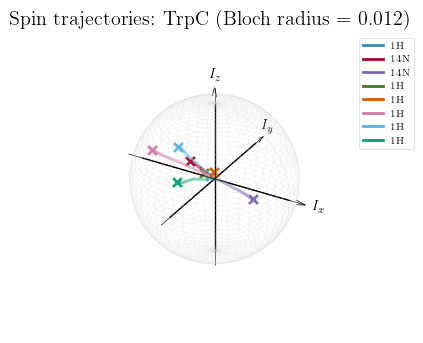

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


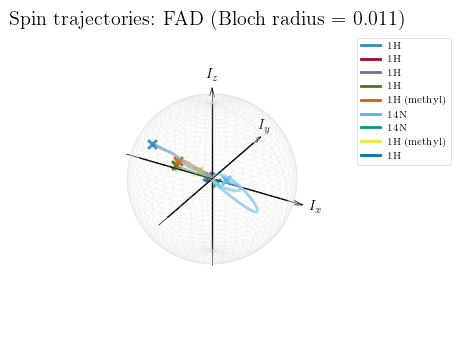

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


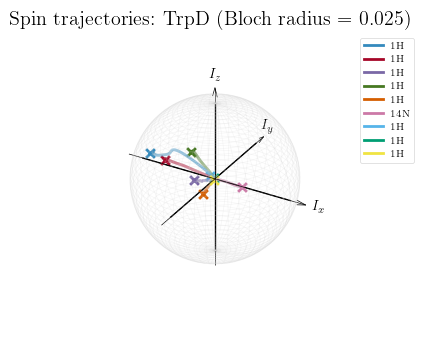

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import colors as mcolors


def get_spin_label(i: int) -> str:
    """Iz プロット (Cell 3) と同じルールで凡例用ラベルを返す"""
    rdm = data[(i, i)]
    # Cell 3 と同じ分子名の割り当て
    if i < 8:
        mol = "TrpC"
    elif i < 18:
        mol = "FAD"
    else:
        mol = "TrpD"

    match rdm.shape[1:]:
        case (2, 2):
            return f"1H"
        case (6, 6):
            return f"1H (methyl)"
        case (3, 3):
            return f"14N"
        case _:
            return mol

def get_mol_marker(i):
    if   i < 8:  return "TrpC", "o"
    elif i < 18: return "FAD", "s"
    else:        return "TrpD", "^"

def mol_indices():
    mols = {"TrpC": [], "FAD": [], "TrpD": []}
    for i in range(27):
        mol, _ = get_mol_marker(i)
        mols[mol].append(i)
    return mols

def compute_radius_all():
    # 全分子・全サイトで最大ノルム取得（radius統一）
    max_radius = 0
    for i in range(27):
        Ix, Iy, Iz = compute_y(i)
        if Iz is None:
            continue
        norms = np.sqrt(Ix**2 + Iy**2 + Iz**2)
        max_radius = max(max_radius, norms.max())
    return max_radius

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
mols = mol_indices()
# 分子ごとに半径を決められるように
radii = {}
for mol, indices in mols.items():
    max_radius = 0
    for i in indices:
        Ix, Iy, Iz = compute_y(i)
        if Iz is None:
            continue
        norms = np.sqrt(Ix**2 + Iy**2 + Iz**2)
        max_radius = max(max_radius, norms.max())
    radii[mol] = max_radius

for mol, indices in mols.items():
    if not indices:
        continue
    radius = radii[mol]

    fig = plt.figure(figsize=(3.8, 3.6))  # 論文用にかなりコンパクトに
    ax = fig.add_subplot(111, projection="3d")

    # 背景色を白に
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")
    
    # 軸調整
    lim = radius * 1.05
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

    # ticks / ラベルは非表示（教科書的なシンプルな軸）
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_axis_off()
    
    arrow_len = 1.2 * radius
    ax.quiver(-arrow_len, 0, 0, 2*arrow_len, 0, 0, color="black", arrow_length_ratio=0.05, linewidth=0.5)
    ax.quiver(0, -arrow_len, 0, 0, 2*arrow_len, 0, color="black", arrow_length_ratio=0.05, linewidth=0.5)
    ax.quiver(0, 0, -arrow_len, 0, 0, 2*arrow_len, color="black", arrow_length_ratio=0.05, linewidth=0.5)

    # 球面（ワイヤーフレーム）は残す
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x_sphere = radius * np.outer(np.cos(u), np.sin(v))
    y_sphere = radius * np.outer(np.sin(u), np.sin(v))
    z_sphere = radius * np.outer(np.ones_like(u), np.cos(v))
    ax.plot_wireframe(x_sphere, y_sphere, z_sphere,
                      color="lightgray", linewidth=0.5, alpha=0.2)

    plotted_start = False  # start markerは1回だけ
    used_labels = set()    # Iz プロットと同じラベルを 1 回だけ表示

    for j, i in enumerate(indices):
        Ix, Iy, Iz = compute_y(i)
        if Iz is None:
            continue
        color = color_cycle[j % len(color_cycle)]
        label = get_spin_label(i)

        # --- グラデーション用のセグメント生成 ---
        pts = np.column_stack([Ix, Iy, Iz])
        # N 点 → N-1 本の線分
        segments = np.stack([pts[:-1], pts[1:]], axis=1)

        # 薄い色(始点)→元の色(終点)のカラーマップを作る
        base_rgb = np.array(mcolors.to_rgb(color))
        light_rgb = 0.6 * base_rgb + 0.4 * np.array([1.0, 1.0, 1.0])  # 少し白を混ぜた薄色
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"grad_{j}", [light_rgb, base_rgb]
        )
        t = np.linspace(0.0, 1.0, len(segments))
        lc = Line3DCollection(segments, cmap=cmap, linewidth=2)
        lc.set_array(t)
        ax.add_collection3d(lc)

        # ラベル用に凡例を1つだけ登録（代表線として plot を1本だけ引く）
        # if label not in used_labels:
        ax.plot([], [], [], color=base_rgb, lw=2, label=label)
        #     used_labels.add(label)

        # 始点（1回だけlegendに追加）
        # if not plotted_start:
        #     ax.scatter(Ix[0], Iy[0], Iz[0], color="green", s=40, label="start")
        #     plotted_start = True
        # else:
        #     ax.scatter(Ix[0], Iy[0], Iz[0], color="green", s=40)
        # 終点（siteごと・legendなし, label指定しない）
        ax.scatter(Ix[-1], Iy[-1], Iz[-1], color=base_rgb, s=40, marker="x")


    # 背景の面を消す + グリッド非表示 + フレーム線を消す
    for pane in [ax.xaxis.pane, ax.yaxis.pane, ax.zaxis.pane]:
        pane.set_visible(False)
    ax.grid(False)
    # 3D 軸の枠線（frame）も消す
    try:
        ax.set_frame_on(False)
    except Exception:
        pass

    # x軸, y軸, z軸を直線（矢印付き）として描画
    axis_vals = np.linspace(-radius, radius, 100)
    # 実線
    ax.plot(axis_vals, np.zeros_like(axis_vals), np.zeros_like(axis_vals),
            color="black", lw=1.0)  # x 軸 (y=z=0)
    ax.plot(np.zeros_like(axis_vals), axis_vals, np.zeros_like(axis_vals),
            color="black", lw=1.0)  # y 軸 (x=z=0)
    ax.plot(np.zeros_like(axis_vals), np.zeros_like(axis_vals), axis_vals,
            color="black", lw=1.0)  # z 軸 (x=y=0)
    # 矢印（原点から正方向）

    # 軸ラベルを矢印の先に配置
    text_r = 1.28 * radius
    ax.text(text_r, 0, 0, r"$I_x$", fontsize=10, ha="left", va="center")
    ax.text(0, text_r, 0, r"$I_y$", fontsize=10, ha="center", va="bottom")
    ax.text(0, 0, text_r, r"$I_z$", fontsize=10, ha="center", va="bottom")

    ax.set_title(f"Spin trajectories: {mol} (Bloch radius = {radius:.3f})")

    # legendは図のすぐ横に（さらに近め）配置
    ax.legend(loc="upper left", fontsize=7, ncol=1, bbox_to_anchor=(0.98, 1.0))
    ax.set_box_aspect([1, 1, 1])

    # 余白を極力小さくしてタイトに配置（legend 分だけ右をわずかに空ける）
    plt.subplots_adjust(left=0.01, right=0.80, bottom=0.01, top=0.99)

    # 高解像度 EPS で保存
    fig.savefig(f"spin_trajectory_{mol}.eps", format="eps", dpi=600, bbox_inches="tight")

    plt.show()


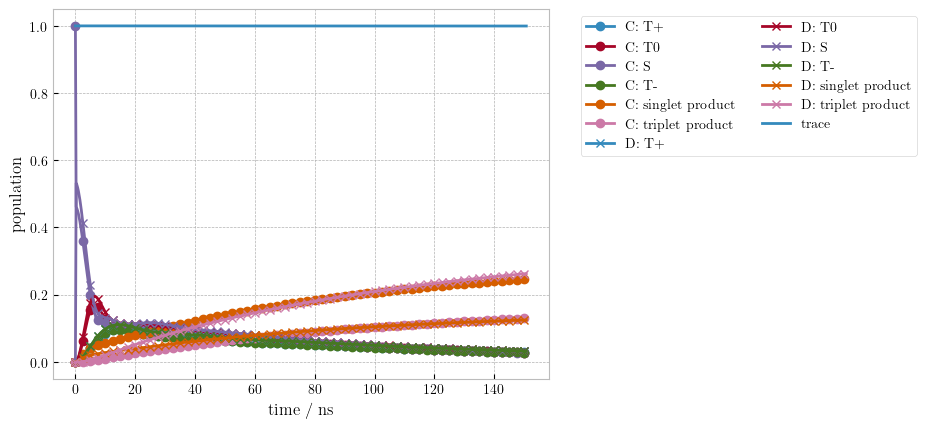

In [6]:
names = {
    0: "C: T+",
    1: "C: T0",
    2: "C: S",
    3: "C: T-",
    4: "C: singlet product",
    5: "C: triplet product",
    6: "D: T+",
    7: "D: T0",
    8: "D: S",
    9: "D: T-",
    10: "D: singlet product",
    11: "D: triplet product",
}
for i in range(12):
    plt.plot(time, data[(13,13)][:, i, i].real, label=names[i], marker="o" if i < 6 else "x", color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i%6], markevery=10)

plt.plot(time, np.einsum("tii->t", data[(13,13)].real), label="trace", markevery=10)
plt.xlabel("time / ns")
plt.ylabel("population")
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1))
plt.show()

